In [1]:
import pandas as pd

In [16]:
# Lendo o arquivo CSV com separador de ponto e vírgula
coleta_preco = pd.read_csv('ColetaPreco.csv', sep=';')
# Exibindo as primeiras linhas da tabela
coleta_preco

,indice,id_posto,id_combustivel,data_coleta,preco
0,1,1,1,07/09/2024,6.09
1,2,1,2,07/09/2024,6.19
2,3,1,3,07/09/2024,4.49
3,4,1,4,07/09/2024,5.99
4,5,1,1,08/09/2024,6.09
...,...,...,...,...,...
227,228,6,4,15/09/2024,6.09
228,229,6,1,16/09/2024,6.29
229,230,6,2,16/09/2024,6.29
230,231,6,3,16/09/2024,4.69


In [8]:
coleta_preco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indice          232 non-null    int64  
 1   id_posto        232 non-null    int64  
 2   id_combustivel  232 non-null    int64  
 3   data_coleta     232 non-null    object 
 4   preco           232 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.2+ KB


In [7]:
combustivel = pd.read_csv('Combustivel.csv', sep = ';')
combustivel.head()

,id_combustivel,tipo_combustivel
0,1,Gasolina Comum
1,2,Gasolina Aditivada
2,3,Etanol
3,4,Diesel


In [11]:
combustivel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_combustivel    4 non-null      int64 
 1   tipo_combustivel  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [14]:
posto_de_combustivel = pd.read_csv('PostoDeCombustivel.csv', sep =';')
posto_de_combustivel

,id_posto,bairro,endereco,nome
0,1,Jardim da Penha,"Av. Fernando Ferrari, 808",BR
1,2,Andorinhas,"Av. N. Sra. da Penha, 2719",SHELL
2,3,Colina de Laranjeiras,"Rod. Governador Mário Covas, Km 256",BR
3,4,Jardim Limoeiro,"Av. Des. Mário da Silva Nunes, 78",SHELL
4,5,Centro VV,"Av. Luciano das Neves, sn",IPIRANGA
5,6,Ibes,"Av. Carlos Lindenberg, 2423",IPIRANGA


In [15]:
posto_de_combustivel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_posto  6 non-null      int64 
 1   bairro    6 non-null      object
 2   endereco  6 non-null      object
 3   nome      6 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


# **1. Gráfico de Linhas: Evolução dos Preços ao Longo do Tempo**
Para visualizar como os preços dos combustíveis mudaram ao longo do tempo.

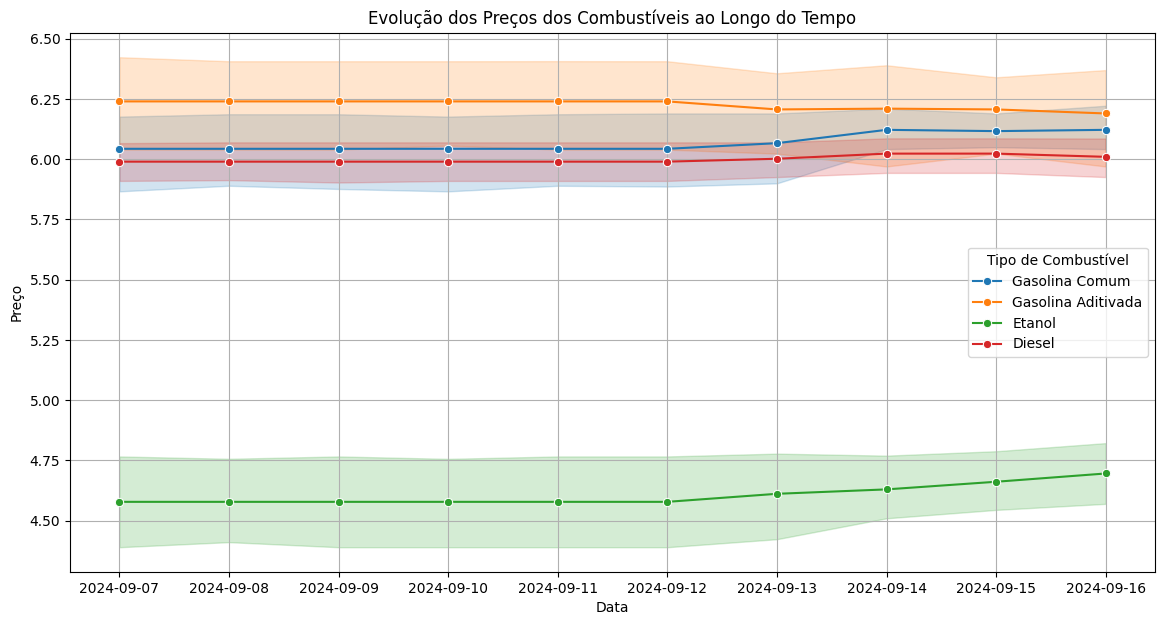

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Converter 'data_coleta' para datetime
coleta_preco['data_coleta'] = pd.to_datetime(coleta_preco['data_coleta'], format='%d/%m/%Y')

# Mesclar os dados
dados = coleta_preco.merge(combustivel, on='id_combustivel')
dados = dados.merge(posto_de_combustivel, on='id_posto')

# Gráfico de Linhas
plt.figure(figsize=(14, 7))
sns.lineplot(data=dados, x='data_coleta', y='preco', hue='tipo_combustivel', marker='o')
plt.title('Evolução dos Preços dos Combustíveis ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend(title='Tipo de Combustível')
plt.grid(True)
plt.show()


# **2. Gráfico de Barras: Comparação dos Preços Médios entre Postos**
Para comparar os preços médios dos combustíveis entre diferentes postos.

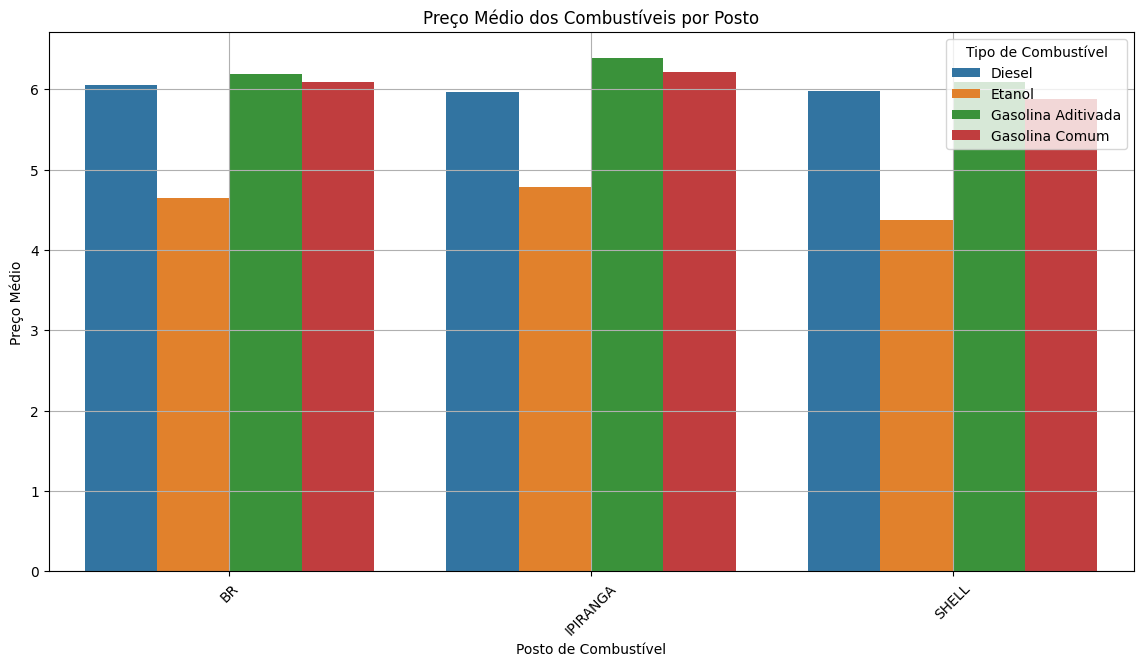

In [18]:
# Calcular o preço médio por posto e tipo de combustível
media_precos = dados.groupby(['nome', 'tipo_combustivel'])['preco'].mean().reset_index()

# Gráfico de Barras
plt.figure(figsize=(14, 7))
sns.barplot(data=media_precos, x='nome', y='preco', hue='tipo_combustivel')
plt.title('Preço Médio dos Combustíveis por Posto')
plt.xlabel('Posto de Combustível')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.grid(True)
plt.show()


# **3. Gráfico de Pizza: Distribuição dos Tipos de Combustível em uma Data Específica**

Para ver a distribuição dos preços dos combustíveis em uma data específica

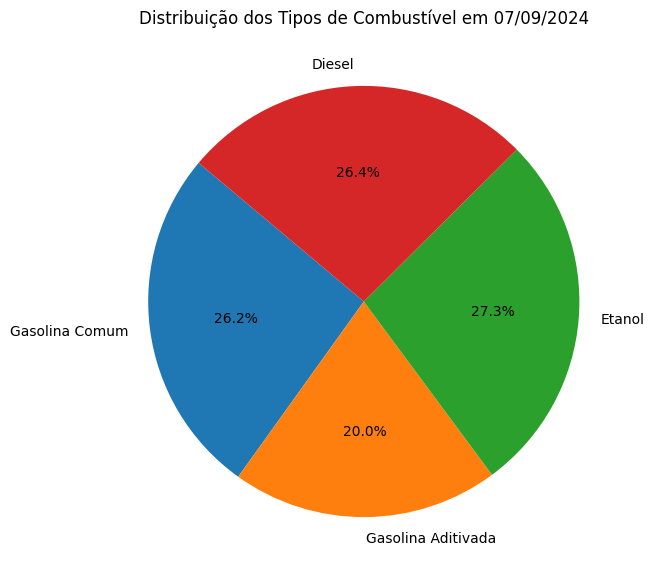

In [21]:
# Filtro para uma data específica (ex: '07/09/2024')
dados_filtro = dados[dados['data_coleta'] == '2024-09-07']

# Gráfico de Pizza
plt.figure(figsize=(10, 7))
plt.pie(dados_filtro.groupby('tipo_combustivel')['preco'].mean(),
        labels=dados_filtro['tipo_combustivel'].unique(),
        autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Combustível em 07/09/2024')
plt.show()

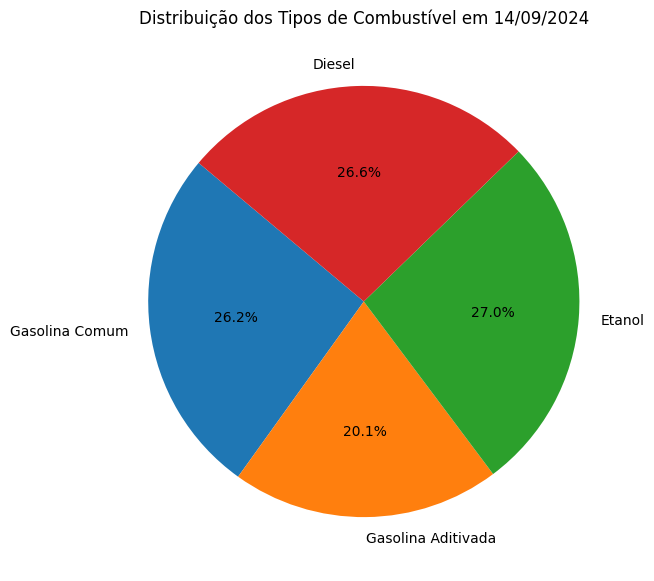

In [31]:
 # Data que foi observada a alteração dos preços.

dados_filtro = dados[dados['data_coleta'] == '2024-09-14']

# Gráfico de Pizza
plt.figure(figsize=(10, 7))
plt.pie(dados_filtro.groupby('tipo_combustivel')['preco'].mean(),
        labels=dados_filtro['tipo_combustivel'].unique(),
        autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Combustível em 14/09/2024')
plt.show()


# **4. Gráfico de Colunas Empilhadas: Preço Total por Posto e Tipo de Combustível**
Para comparar a participação de cada tipo de combustível no preço total por posto

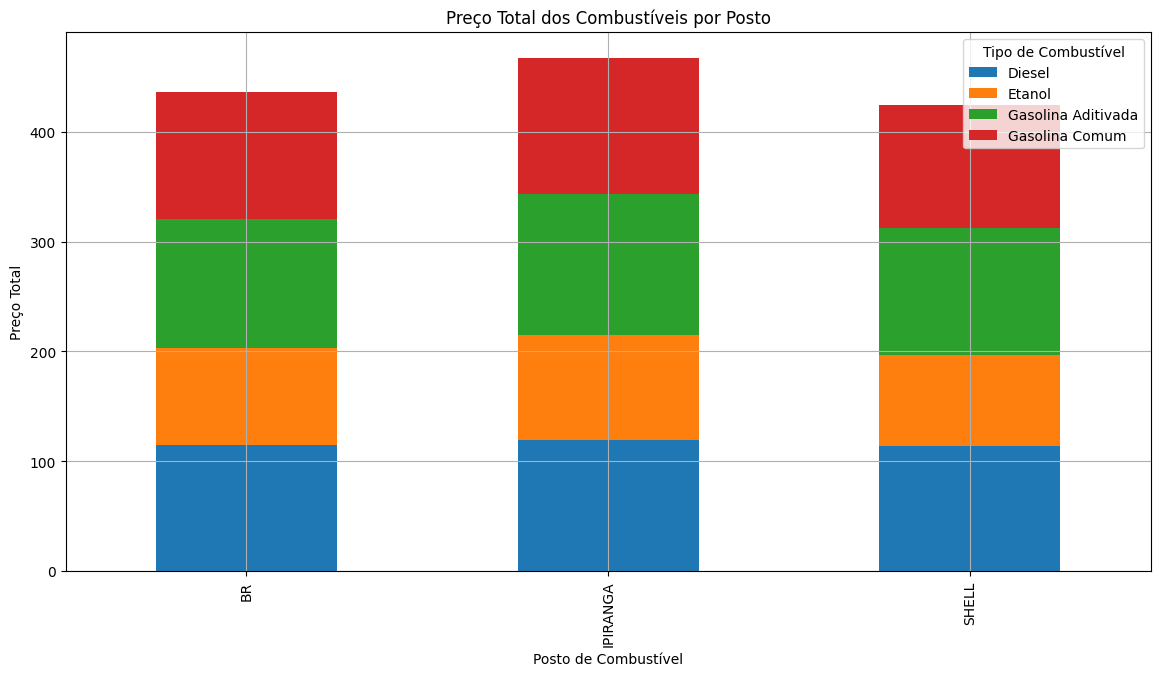

In [23]:
# Pivotar a tabela para criar colunas para cada tipo de combustível
pivot = dados.pivot_table(index='nome', columns='tipo_combustivel', values='preco', aggfunc='sum').fillna(0)

# Gráfico de Colunas Empilhadas
pivot.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Preço Total dos Combustíveis por Posto')
plt.xlabel('Posto de Combustível')
plt.ylabel('Preço Total')
plt.legend(title='Tipo de Combustível')
plt.grid(True)
plt.show()


# **6. Distribuição dos Preços por Tipo de Combustível**
Para entender a distribuição dos preços dentro de cada tipo de combustível.

<ipython-input-35-c4d4582d7799>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




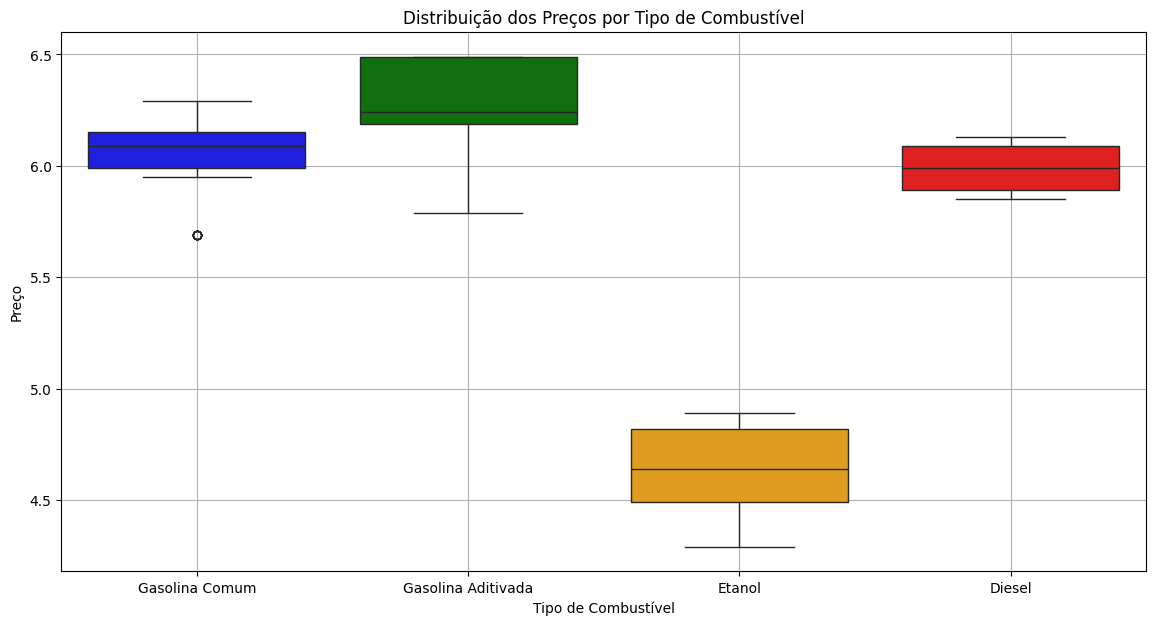

In [35]:
# Criar um dicionário de cores para cada tipo de combustível
cores_combustivel = {
    'Gasolina Comum': 'blue',
    'Gasolina Aditivada': 'green',
    'Etanol': 'orange',
    'Diesel': 'red'
}

# Gráfico de Boxplot com cores diferentes para cada tipo de combustível
plt.figure(figsize=(14, 7))
sns.boxplot(data=dados, x='tipo_combustivel', y='preco', palette=cores_combustivel)
plt.title('Distribuição dos Preços por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço')
plt.grid(True)
plt.show()


# **7. Comparação por Posto em uma Data Específica**
Veja como os preços variam entre os postos em uma data específica.

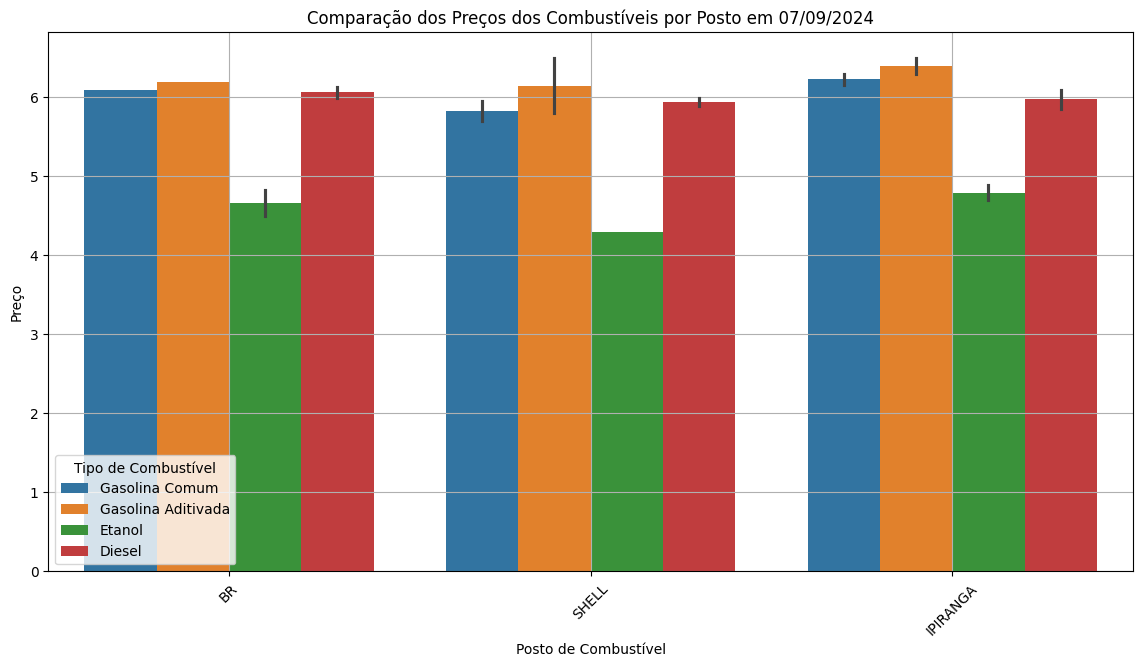

In [27]:
# Filtro para uma data específica
dados_filtro = dados[dados['data_coleta'] == '2024-09-07']

plt.figure(figsize=(14, 7))
sns.barplot(data=dados_filtro, x='nome', y='preco', hue='tipo_combustivel')
plt.title('Comparação dos Preços dos Combustíveis por Posto em 07/09/2024')
plt.xlabel('Posto de Combustível')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.grid(True)
plt.show()


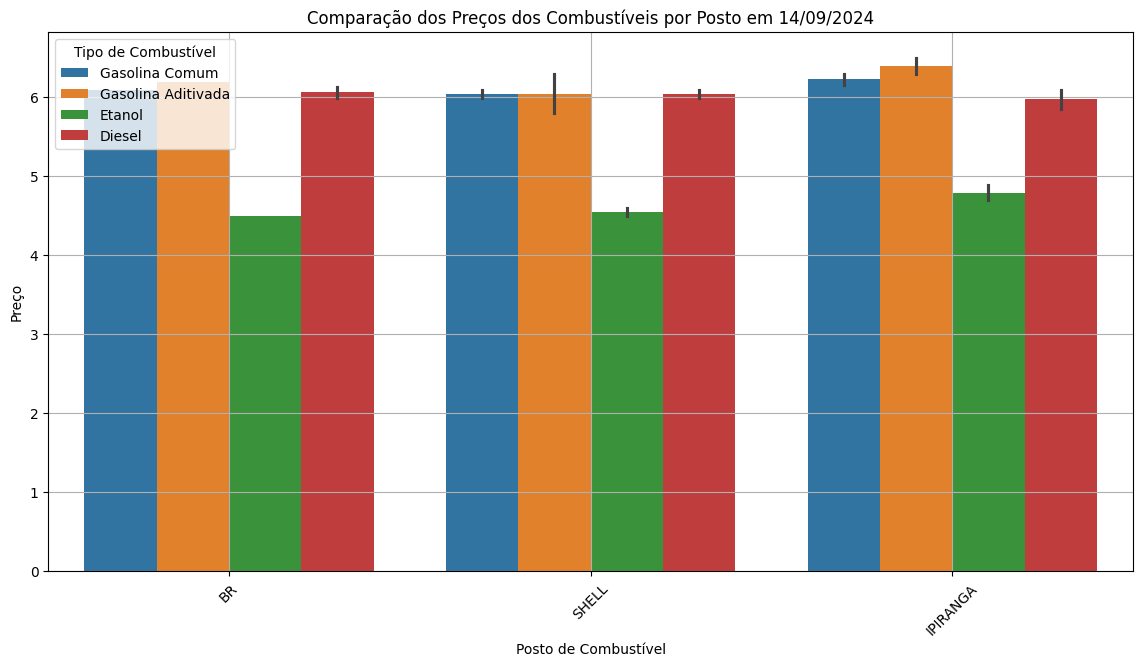

In [30]:
# Filtro para uma data específica
dados_filtro = dados[dados['data_coleta'] == '2024-09-14']

plt.figure(figsize=(14, 7))
sns.barplot(data=dados_filtro, x='nome', y='preco', hue='tipo_combustivel')
plt.title('Comparação dos Preços dos Combustíveis por Posto em 14/09/2024')
plt.xlabel('Posto de Combustível')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.grid(True)
plt.show()


#**TABELAS**

## **1. Tabela de Preços por Data e Posto**

In [40]:
import plotly.graph_objects as go

# Criar uma tabela com preços por data e posto
fig_precos = go.Figure(data=[go.Table(
    header=dict(values=['Data Coleta', 'Nome do Posto', 'Tipo de Combustível', 'Preço'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dados['data_coleta'].astype(str), dados['nome'], dados['tipo_combustivel'], dados['preco']],
               fill_color='lavender',
               align='left'))
])

# Ajustar o layout
fig_precos.update_layout(title='Preços dos Combustíveis por Data e Posto')

# Exibir a tabela interativa
fig_precos.show()


## **2. Tabela de Médias de Preços por Tipo de Combustível**

In [41]:
import plotly.graph_objects as go

# Calcular a média dos preços por tipo de combustível
tabela_media_precos = dados.groupby('tipo_combustivel')['preco'].mean().reset_index()

# Criar uma tabela com as médias de preços
fig_media_precos = go.Figure(data=[go.Table(
    header=dict(values=['Tipo de Combustível', 'Preço Médio'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[tabela_media_precos['tipo_combustivel'], tabela_media_precos['preco']],
               fill_color='lavender',
               align='left'))
])

# Ajustar o layout
fig_media_precos.update_layout(title='Média dos Preços por Tipo de Combustível')

# Exibir a tabela interativa
fig_media_precos.show()


## **3. Tabela de Preços por Posto e Tipo de Combustível**

In [42]:
import plotly.graph_objects as go

# Calcular a média dos preços por posto e tipo de combustível
tabela_preco_posto = dados.groupby(['nome', 'tipo_combustivel'])['preco'].mean().reset_index()

# Criar uma tabela com os preços por posto e tipo de combustível
fig_preco_posto = go.Figure(data=[go.Table(
    header=dict(values=['Posto', 'Tipo de Combustível', 'Preço Médio'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[tabela_preco_posto['nome'], tabela_preco_posto['tipo_combustivel'], tabela_preco_posto['preco']],
               fill_color='lavender',
               align='left'))
])

# Ajustar o layout
fig_preco_posto.update_layout(title='Preços Médios por Posto e Tipo de Combustível')

# Exibir a tabela interativa
fig_preco_posto.show()


## **4. Tabela de Preços ao Longo do Tempo**

In [43]:
import plotly.graph_objects as go

# Criar uma tabela de preços ao longo do tempo
tabela_tempo = dados[['data_coleta', 'tipo_combustivel', 'preco']]
tabela_tempo.sort_values(by=['data_coleta', 'tipo_combustivel'], inplace=True)

# Criar uma tabela com os preços ao longo do tempo
fig_tempo = go.Figure(data=[go.Table(
    header=dict(values=['Data Coleta', 'Tipo de Combustível', 'Preço'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[tabela_tempo['data_coleta'].astype(str), tabela_tempo['tipo_combustivel'], tabela_tempo['preco']],
               fill_color='lavender',
               align='left'))
])

# Ajustar o layout
fig_tempo.update_layout(title='Preços dos Combustíveis ao Longo do Tempo')

# Exibir a tabela interativa
fig_tempo.show()


<ipython-input-43-5aed9ba060fd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

